In [1]:
from keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 14s 6us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
# preparing the data 
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results 

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(train_labels)

In [10]:
one_hot_train_labels

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
from keras import models 
from keras import layers 

model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer = 'rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=9,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.1059 - acc: 0.9574 - val_loss: 1.1058 - val_acc: 0.7990
Epoch 2/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.1024 - acc: 0.9583 - val_loss: 1.1117 - val_acc: 0.8030
Epoch 3/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.1031 - acc: 0.9590 - val_loss: 1.0902 - val_acc: 0.8000
Epoch 4/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.1030 - acc: 0.9573 - val_loss: 1.1188 - val_acc: 0.7960
Epoch 5/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.0975 - acc: 0.9590 - val_loss: 1.1509 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.0993 - acc: 0.9565 - val_loss: 1.2260 - val_acc: 0.7890
Epoch 7/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.0965 - acc: 0.9573 - val_loss: 1.1760 - val_acc: 0.7960
Epoch 8

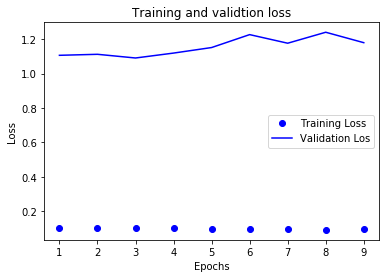

In [22]:
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Los')
plt.title('Training and validtion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

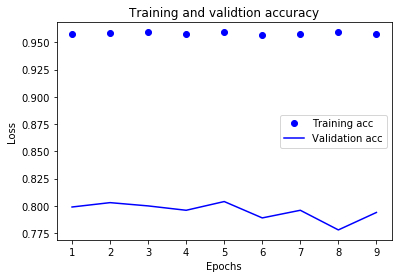

In [23]:
# plotting the training and validation accuracy 

plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validtion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
results = model.evaluate(x_test[:1000], one_hot_test_labels[:1000])

1000/1000 [==============================] - 0s 137us/step


In [27]:
results

[7.4961248779296872, 0.20100000000000001]

In [28]:
predictions = model.predict(x_test)

In [30]:
predictions[0].shape

(46,)

In [31]:
np.sum(predictions[0])

0.99999982